<Axes: >

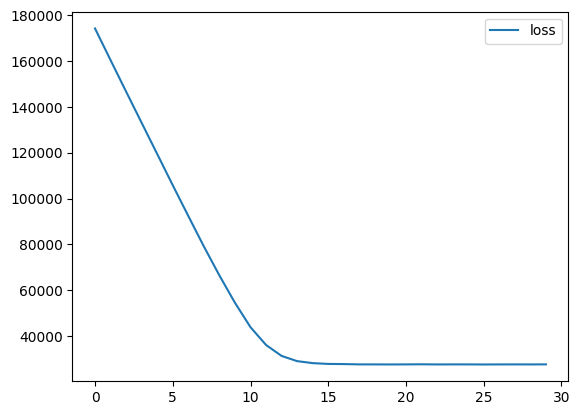

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf

houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')

numeric_features_names = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']
X = tf.convert_to_tensor(numeric_features)
Y = tf.convert_to_tensor(houses_train['SalePrice'])
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)

model = tf.keras.Sequential([
    normalizer,
    
    tf.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    loss='mean_absolute_error', 
    optimizer=tf.keras.optimizers.legacy.Adam(300),
)
hist = model.fit(X, Y, epochs=30, verbose=0)
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss']].plot()



46/46 [==============================] - 0s 2ms/step


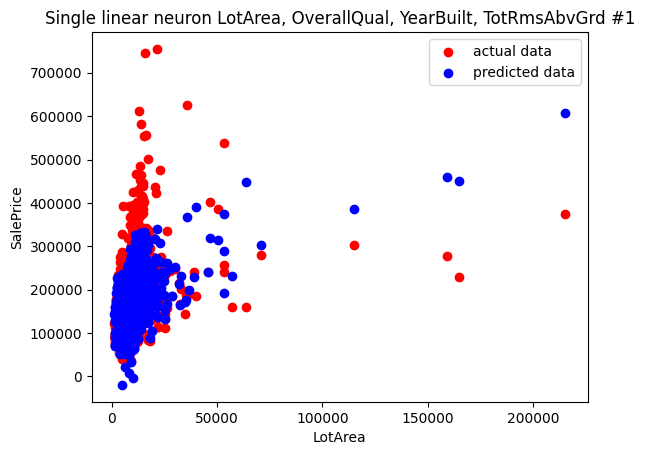

In [43]:
import matplotlib.pyplot as plt
Y_predict = model.predict(X)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Single linear neuron LotArea, OverallQual, YearBuilt, TotRmsAbvGrd #1')
plt.legend()


In [45]:
X_test = tf.convert_to_tensor(houses_test[numeric_features_names])
Y_test = model.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test), axis=1)
np.savetxt("submission4.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

46/46 [==============================] - 0s 3ms/step
